In [1]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
from matplotlib import pyplot as plt

In [2]:
import shap
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
DATASET = 'DatasetPro4.0.csv'
dataset = pd.read_csv(DATASET)
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
lipids_only = dataset.iloc[:, list(range(858,1639))]
X = lipids_only
y = dataset['LHC_ICV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(output_df)

Mean Squared Error: 1.0474450164774978e-07

Actual vs Predicted:
        Actual  Predicted
2740  0.002298   0.002422
1911  0.002196   0.002292
1263  0.001822   0.001963
1456  0.002233   0.002114
2254  0.002549   0.002299
...        ...        ...
315   0.001699   0.001943
798   0.001674   0.002085
759   0.001769   0.001906
568   0.002000   0.001984
644   0.002171   0.002075

[551 rows x 2 columns]


### Classification

In [8]:
DATASET = 'Dataset_Ciaran_McEvoy.csv'
dataset = pd.read_csv(DATASET)

dataset.replace('M', 1, inplace=True)
dataset.replace('F', 0, inplace=True)
X = dataset.drop(columns=['VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])
y = dataset['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(output_df)

Accuracy: 0.6352941176470588

Actual vs Predicted:
     Actual Predicted
56      MCI       MCI
194      AD        AD
2225     CN        CN
233     MCI       MCI
1902     AD       MCI
...     ...       ...
2296     CN        CN
1127     AD       MCI
2456   LMCI        CN
1915     CN       MCI
841      CN        CN

[510 rows x 2 columns]


### Regression

Mean Absolute Error: 0.0003152866868686274
R-squared: 0.22066287284555852
Mean Percentage Error on Test Set: 15.9880%

Actual vs Predicted:
        Actual  Predicted
56    0.001567   0.002096
194   0.001440   0.001818
2225  0.002216   0.002390
233   0.002248   0.002257
1902  0.001589   0.002192
...        ...        ...
2296  0.002643   0.002062
1127  0.001835   0.002084
2456  0.002528   0.002229
1915  0.002439   0.002203
841   0.002566   0.002160

[510 rows x 2 columns]


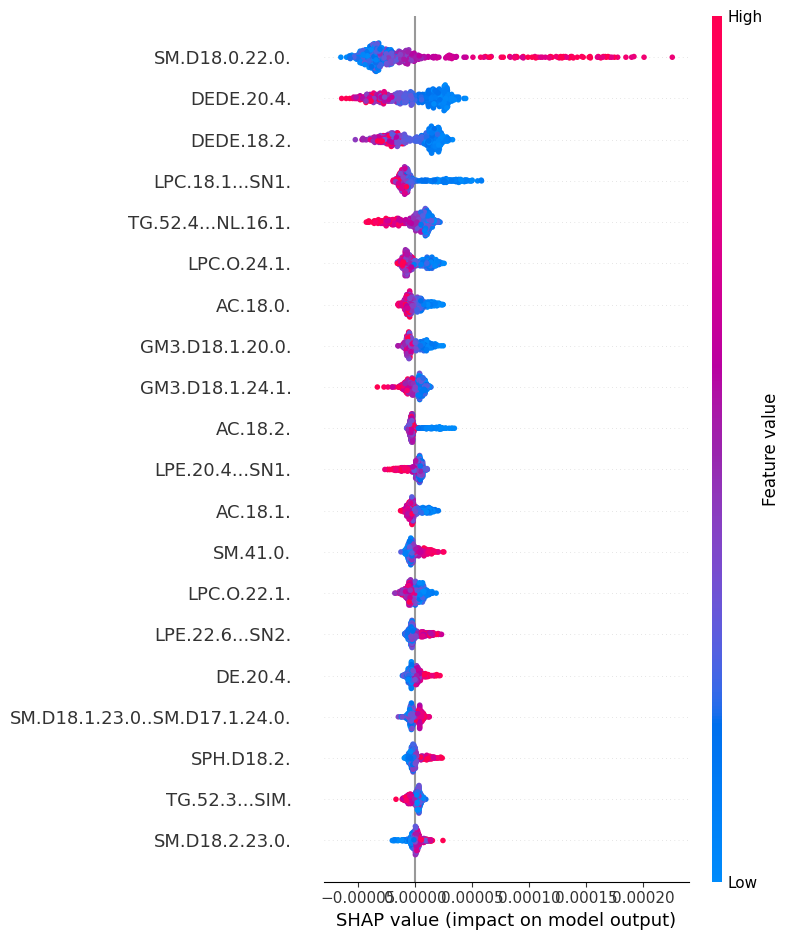

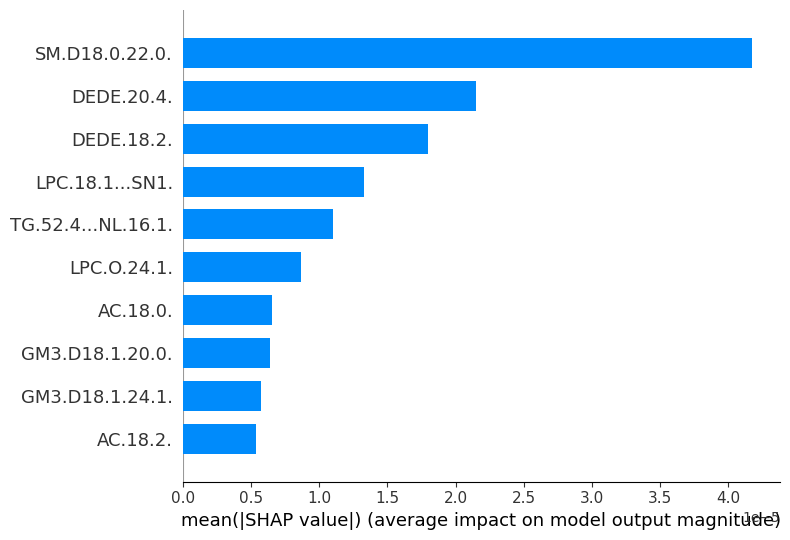

In [4]:
DATASET = 'Dataset3.0.csv'
dataset = pd.read_csv(DATASET)
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
lipids_only = dataset.iloc[:, 54:837]
columns_to_drop = ['LHC_ICV', 'RHC_ICV']
X = lipids_only.drop(columns=columns_to_drop, axis=1)
y = lipids_only['LHC_ICV']

# Assuming 'X' and 'y' are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

mape = MAPE(y_test, y_pred)
print(f"Mean Percentage Error on Test Set: {mape:.4f}%")

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(output_df)

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Plot the top 5 features based on mean absolute SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar", max_display=10)